In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
# Veri yükleme (örnek bir dataset yüklenmelidir)
df = pd.read_csv("/content/sample_data/csv_building_structure.csv")

In [13]:
df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


In [14]:
# Özellikler ve hedef değişkeni ayırma
features = [
    "plinth_area_sq_ft",
    "land_surface_condition",
    "count_floors_pre_eq",
    "height_ft_pre_eq",
    "roof_type",
    "age_building",
    "foundation_type",
    "ground_floor_type",
    "other_floor_type",
    "has_superstructure_adobe_mud",
    "has_superstructure_stone_flag",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_mud_mortar_brick",
    "has_superstructure_cement_mortar_brick",
    "has_superstructure_timber",
    "has_superstructure_bamboo",
    "has_superstructure_rc_non_engineered",
    "has_superstructure_rc_engineered",
    "has_superstructure_other",
]

X = df[features]
y = df['damage_grade']  # Hedef değişken

In [15]:
def extract_grade_number(grade):
  if pd.isnull(grade):
    return np.nan
  else:
    return int(grade.split()[-1])

df['damage_grade'] = df['damage_grade'].apply(extract_grade_number)

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Kategorik sütunları bulma
categorical_columns = X.select_dtypes(include=['object']).columns

# Kategorik sütunları Label Encoding ile sayısallaştırma
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Özellikleri standardize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Geri kalan kod aynı


<ipython-input-16-f84cae3e4161>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-16-f84cae3e4161>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-16-f84cae3e4161>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [17]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Özellikleri standardize etme
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Random Forest Modeli
rf_model = RandomForestClassifier(
    n_estimators=750,
    max_features=25,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [19]:
### 2. Neural Network Modeli
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Sınıf sayısı
])

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Modeli eğitme
nn_history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Test seti üzerinde tahminler
nn_pred = np.argmax(nn_model.predict(X_test), axis=1)
nn_accuracy = accuracy_score(y_test, nn_pred)

4764/4764 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


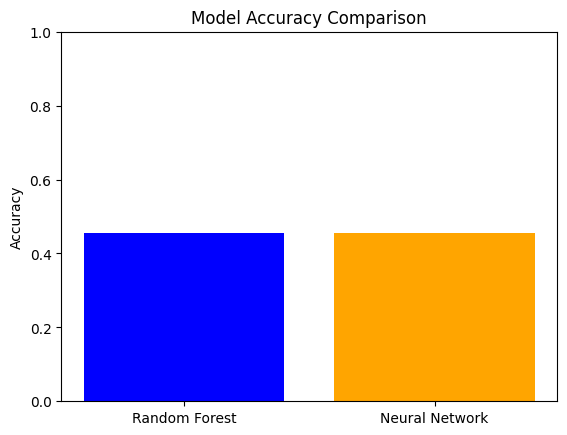

Random Forest Doğruluk: 0.46
Neural Network Doğruluk: 0.46


In [21]:
### 3. Sonuçları Karşılaştırma ve Grafik
models = ['Random Forest', 'Neural Network']
accuracies = [rf_accuracy, nn_accuracy]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Her iki modelin doğruluğunu yazdırma
print(f"Random Forest Doğruluk: {rf_accuracy:.2f}")
print(f"Neural Network Doğruluk: {nn_accuracy:.2f}")